Text(0.5, 1.0, 'bits:2 ops:3')

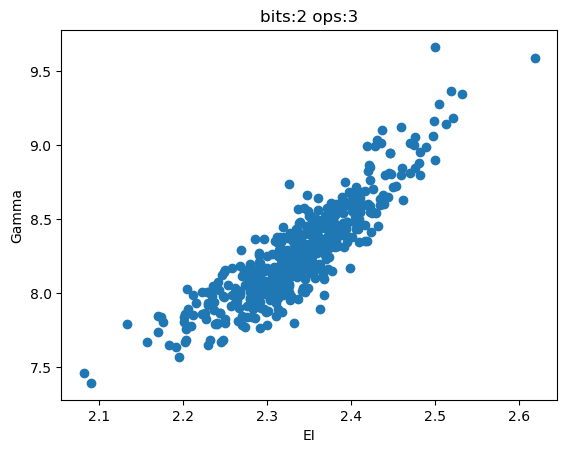

In [4]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from q_funcs import quantum_EI, generate_kraus_operators, kraus_to_transfer_matrix
from q_funcs import generate_depolarizing_kraus_operators, tpm_ei, compute_M_matrix_n_qubit


np.random.seed(42)
n = 2 #原本的量子比特数
k = 3
sample = 500
eigs_ls = []
ei_ls = []
for s in range(sample):
    kraus_operators = generate_kraus_operators(2**n, k)
    k_list = [kraus_operators[:,:,i] for i in range(k)]
    ei_ls.append(quantum_EI(k_list,2*n))
    M_mat = compute_M_matrix_n_qubit(k_list)
    U, singular, V = np.linalg.svd(M_mat, full_matrices=False)
    eigs_ls.append(np.sum(singular))

    
plt.scatter(ei_ls, eigs_ls)
plt.xlabel("EI")
plt.ylabel("Gamma")
plt.title("bits:{0} ops:{1}".format(n,k))

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from q_funcs import quantum_EI, generate_kraus_operators, kraus_to_transfer_matrix
from q_funcs import generate_depolarizing_kraus_operators, tpm_ei, compute_M_matrix

gamma = 0.1  # 噪声参数
K0 = np.array([[1, 0], [0, np.sqrt(1 - gamma)]])
K1 = np.array([[0, np.sqrt(gamma)], [0, 0]])

M = compute_M_matrix([K0, K1])
print("线性变换矩阵M:\n", M)

线性变换矩阵M:
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00 5.55111512e-17]
 [0.00000000e+00 9.48683298e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.48683298e-01 0.00000000e+00]
 [1.00000000e-01 0.00000000e+00 0.00000000e+00 9.00000000e-01]]


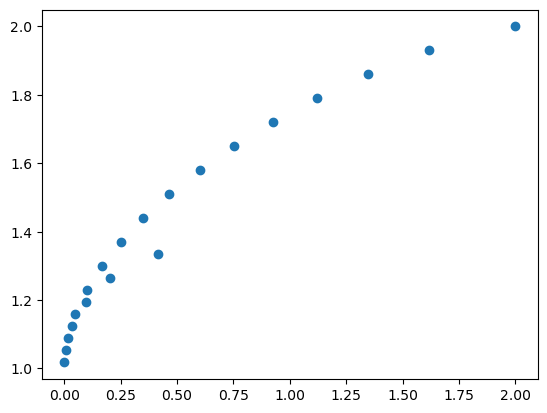

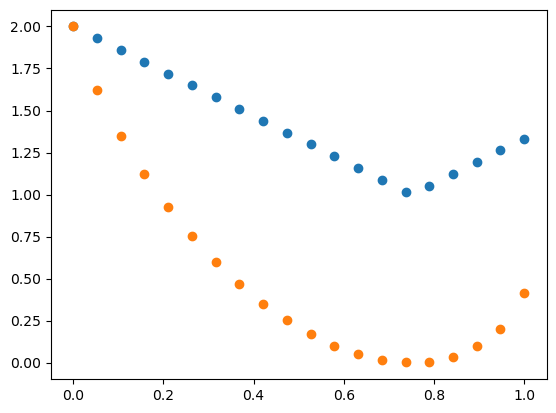

In [2]:
sing_ls = []
EI_ls = []
for p in np.linspace(0,1,20):
    kraus_ls = generate_depolarizing_kraus_operators(p)
    P = kraus_to_transfer_matrix(kraus_ls)
    U, singular, V = np.linalg.svd(P, full_matrices=False)
    sing_ls.append(np.sum(singular))
    EI_ls.append(quantum_EI(kraus_ls, 2))


plt.scatter(EI_ls, sing_ls)
plt.figure()
plt.scatter(np.linspace(0,1,20), sing_ls)
plt.scatter(np.linspace(0,1,20), EI_ls)

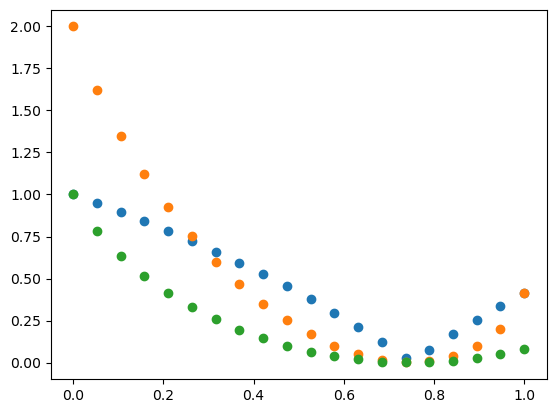

In [5]:
sing_ls = []
EI_ls = []
EI_P_ls = []
for p in np.linspace(0,1,20):
    kraus_ls = generate_depolarizing_kraus_operators(p)
    P = kraus_to_transfer_matrix(kraus_ls)
    U, singular, V = np.linalg.svd(P, full_matrices=False)
    sing_pro = np.log2(np.sum(singular))
    sing_ls.append(sing_pro)
    EI_ls.append(quantum_EI(kraus_ls, 2))
    EI_P_ls.append(tpm_ei(P))


#plt.scatter(EI_ls, sing_ls)
plt.figure()
plt.scatter(np.linspace(0,1,20), sing_ls)
plt.scatter(np.linspace(0,1,20), EI_ls)
plt.scatter(np.linspace(0,1,20), EI_P_ls)

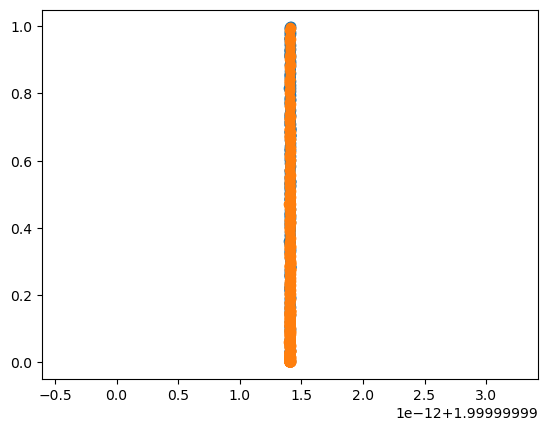

In [9]:
np.random.seed(42)
n = 1
k = 1
sample = 1000
sing_ls = []
EI_ls = []
EI_P_ls = []
for s in range(sample):
    kraus_operators = generate_kraus_operators(2**n, k)
    kraus_ls = [kraus_operators[:,:,i] for i in range(k)]
    P = kraus_to_transfer_matrix(kraus_ls)
    U, singular, V = np.linalg.svd(P, full_matrices=False)
    sing_pro = np.log2(np.sum(singular))
    sing_ls.append(sing_pro)
    EI_ls.append(quantum_EI(kraus_ls, 2*n))
    EI_P_ls.append(tpm_ei(P))
    
plt.figure()
plt.scatter(EI_ls, sing_ls)
plt.scatter(EI_ls, EI_P_ls)